In [20]:
import pandas as pd
import numpy as np
import os
#import rasterio
from IPython.display import Image
from shutil import rmtree
from dateutil import parser
import toyplot

import seaborn as sns
import numpy as np
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [21]:
inat_flowering = pd.read_csv('../manuscript/final_data/fulldata_cleaned_matched_GPT_colors.csv')

/var/folders/qh/c7rwx84921n2kznn09zb2pnh0000gn/T/ipykernel_14229/747216126.py:1: DtypeWarning: Columns (14,29) have mixed types. Specify dtype option on import or set low_memory=False.
  inat_flowering = pd.read_csv('../manuscript/final_data/fulldata_cleaned_matched_GPT_colors.csv')


# Get the data (species)

In [22]:
spcolors = [np.unique(inat_flowering[inat_flowering.binomial.eq(i)].color)[0] for i in np.unique(inat_flowering.binomial)]

In [23]:
np.unique(spcolors)

array(['blue', 'brown', 'green', 'maroon', 'orange', 'pink', 'purple',
       'red', 'white', 'yellow'], dtype='<U6')

In [24]:
allcolors = ['green','blue', 'maroon','brown', 'orange','red','pink', 'purple', 'white', 'yellow']
numcolors = []
for color in allcolors:
    numcolors.append(np.sum(np.array(spcolors) == color) / len(spcolors))

In [25]:
numcolors

[0.08849859323045443,
 0.041606275044760846,
 0.008440617273424844,
 0.04194731008611135,
 0.0276238383493904,
 0.02506607553926166,
 0.14587773893767583,
 0.13956859067269162,
 0.2513428254753176,
 0.2300281353909114]

In [26]:
nums_reduced = numcolors[0:2] + [numcolors[2]+numcolors[3]] + numcolors[4:]

In [27]:
allcolors_reduced = allcolors[0:2] + ['brown'] + allcolors[4:]

In [28]:
# defining a new brown that looks more... brown... than the default
colors_for_plotting = allcolors_reduced
colors_for_plotting[2] = '#7B3F00'

In [29]:
len(spcolors)

11729

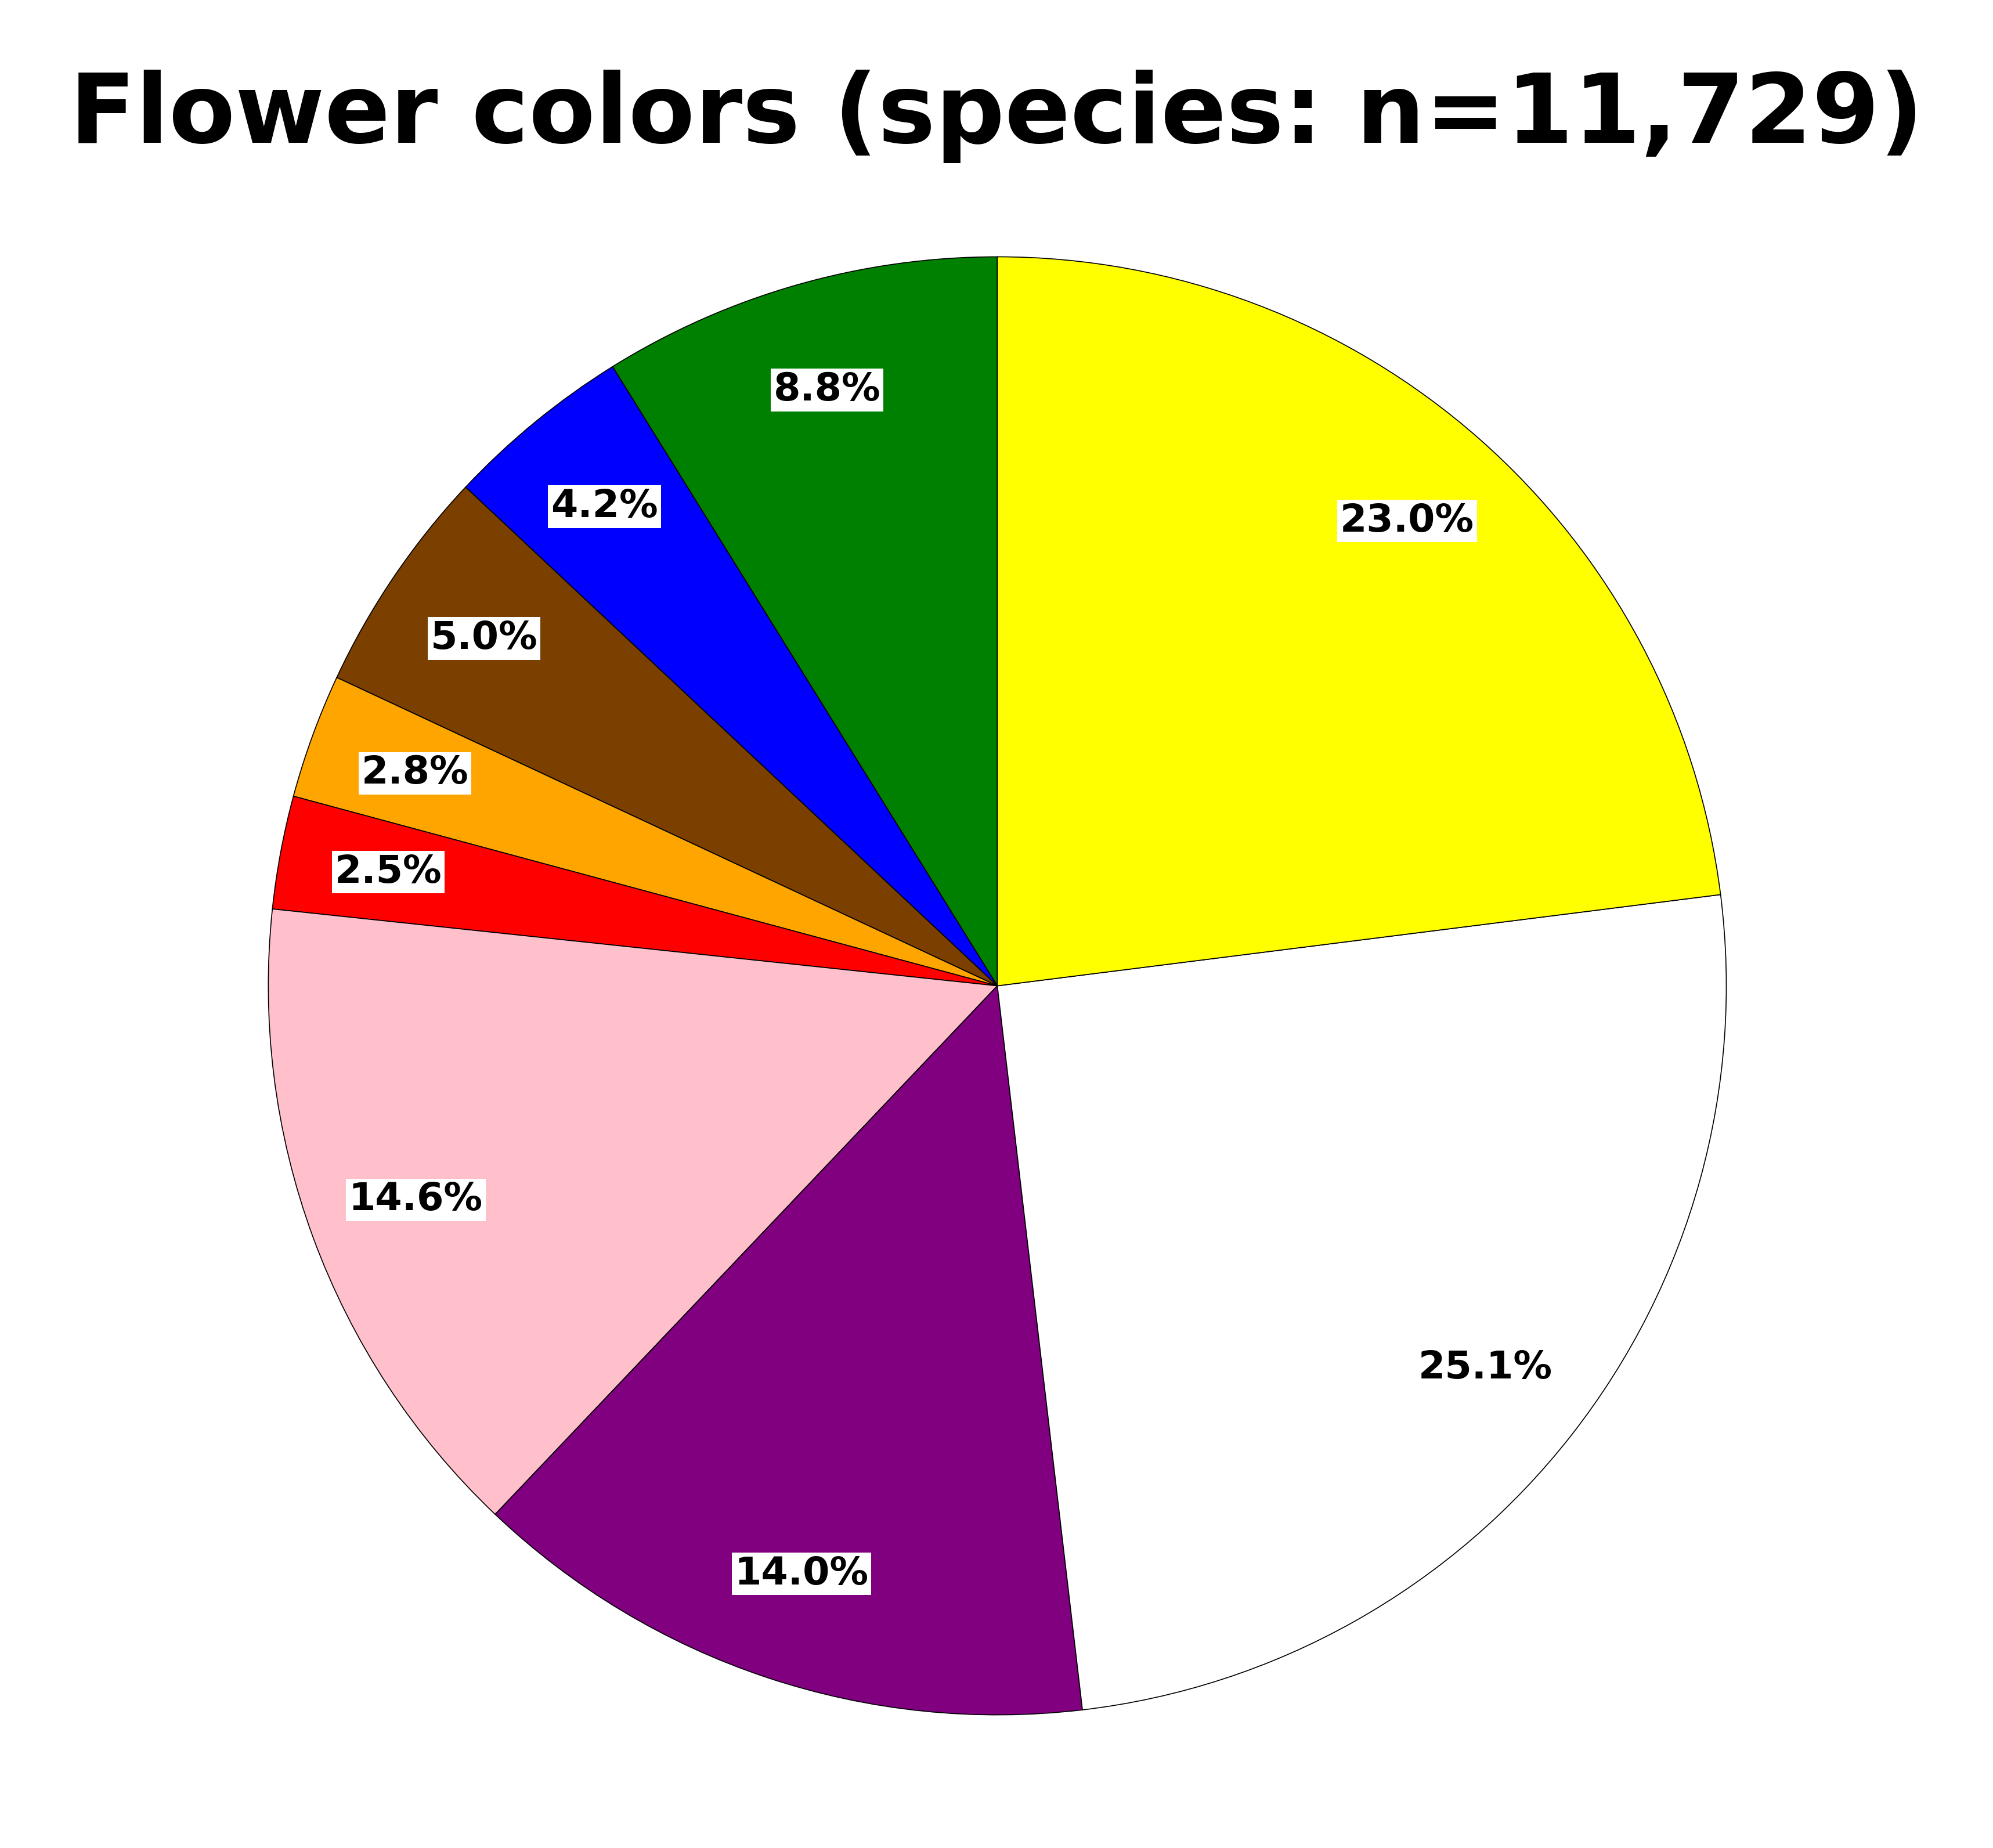

In [30]:
# High resolution
rcParams['figure.dpi'] = 1200

# Create a pie chart
fig, ax = plt.subplots(figsize=[3,3])

wedges, texts, autotexts = ax.pie(nums_reduced, colors=colors_for_plotting, labels=None, autopct='%1.1f%%',
                                  startangle=90, textprops=dict(color="black"), pctdistance=.85,
                                  wedgeprops=dict(edgecolor='black', linewidth=.1), labeldistance=1.4)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Style the texts
plt.setp(texts, size=4)
for autotext in autotexts:
    autotext.set_size(4)
    autotext.set_weight("bold")
    autotext.set_bbox(dict(facecolor='white', edgecolor='none', pad=.3))

# Title
plt.title('Flower colors (species: n=11,729)', fontsize=10, fontweight='bold')

# Save the chart to a file
plt.savefig('../species_pie_chart.pdf', bbox_inches='tight', dpi='figure')

# Display the chart
plt.show()

# Get the data (occurrences)

In [31]:
numcolors = []
for color in allcolors:
    numcolors.append(np.sum(np.array(inat_flowering.color) == color) / len(spcolors))

In [32]:
len(inat_flowering.color)

1674908

In [33]:
# combine brown and maroon
nums_reduced = numcolors[0:2] + [numcolors[2]+numcolors[3]] + numcolors[4:]
allcolors_reduced = allcolors[0:2] + ['brown'] + allcolors[4:]

# defining a new brown that looks more... brown... than the default
colors_for_plotting = allcolors_reduced
colors_for_plotting[2] = '#7B3F00'

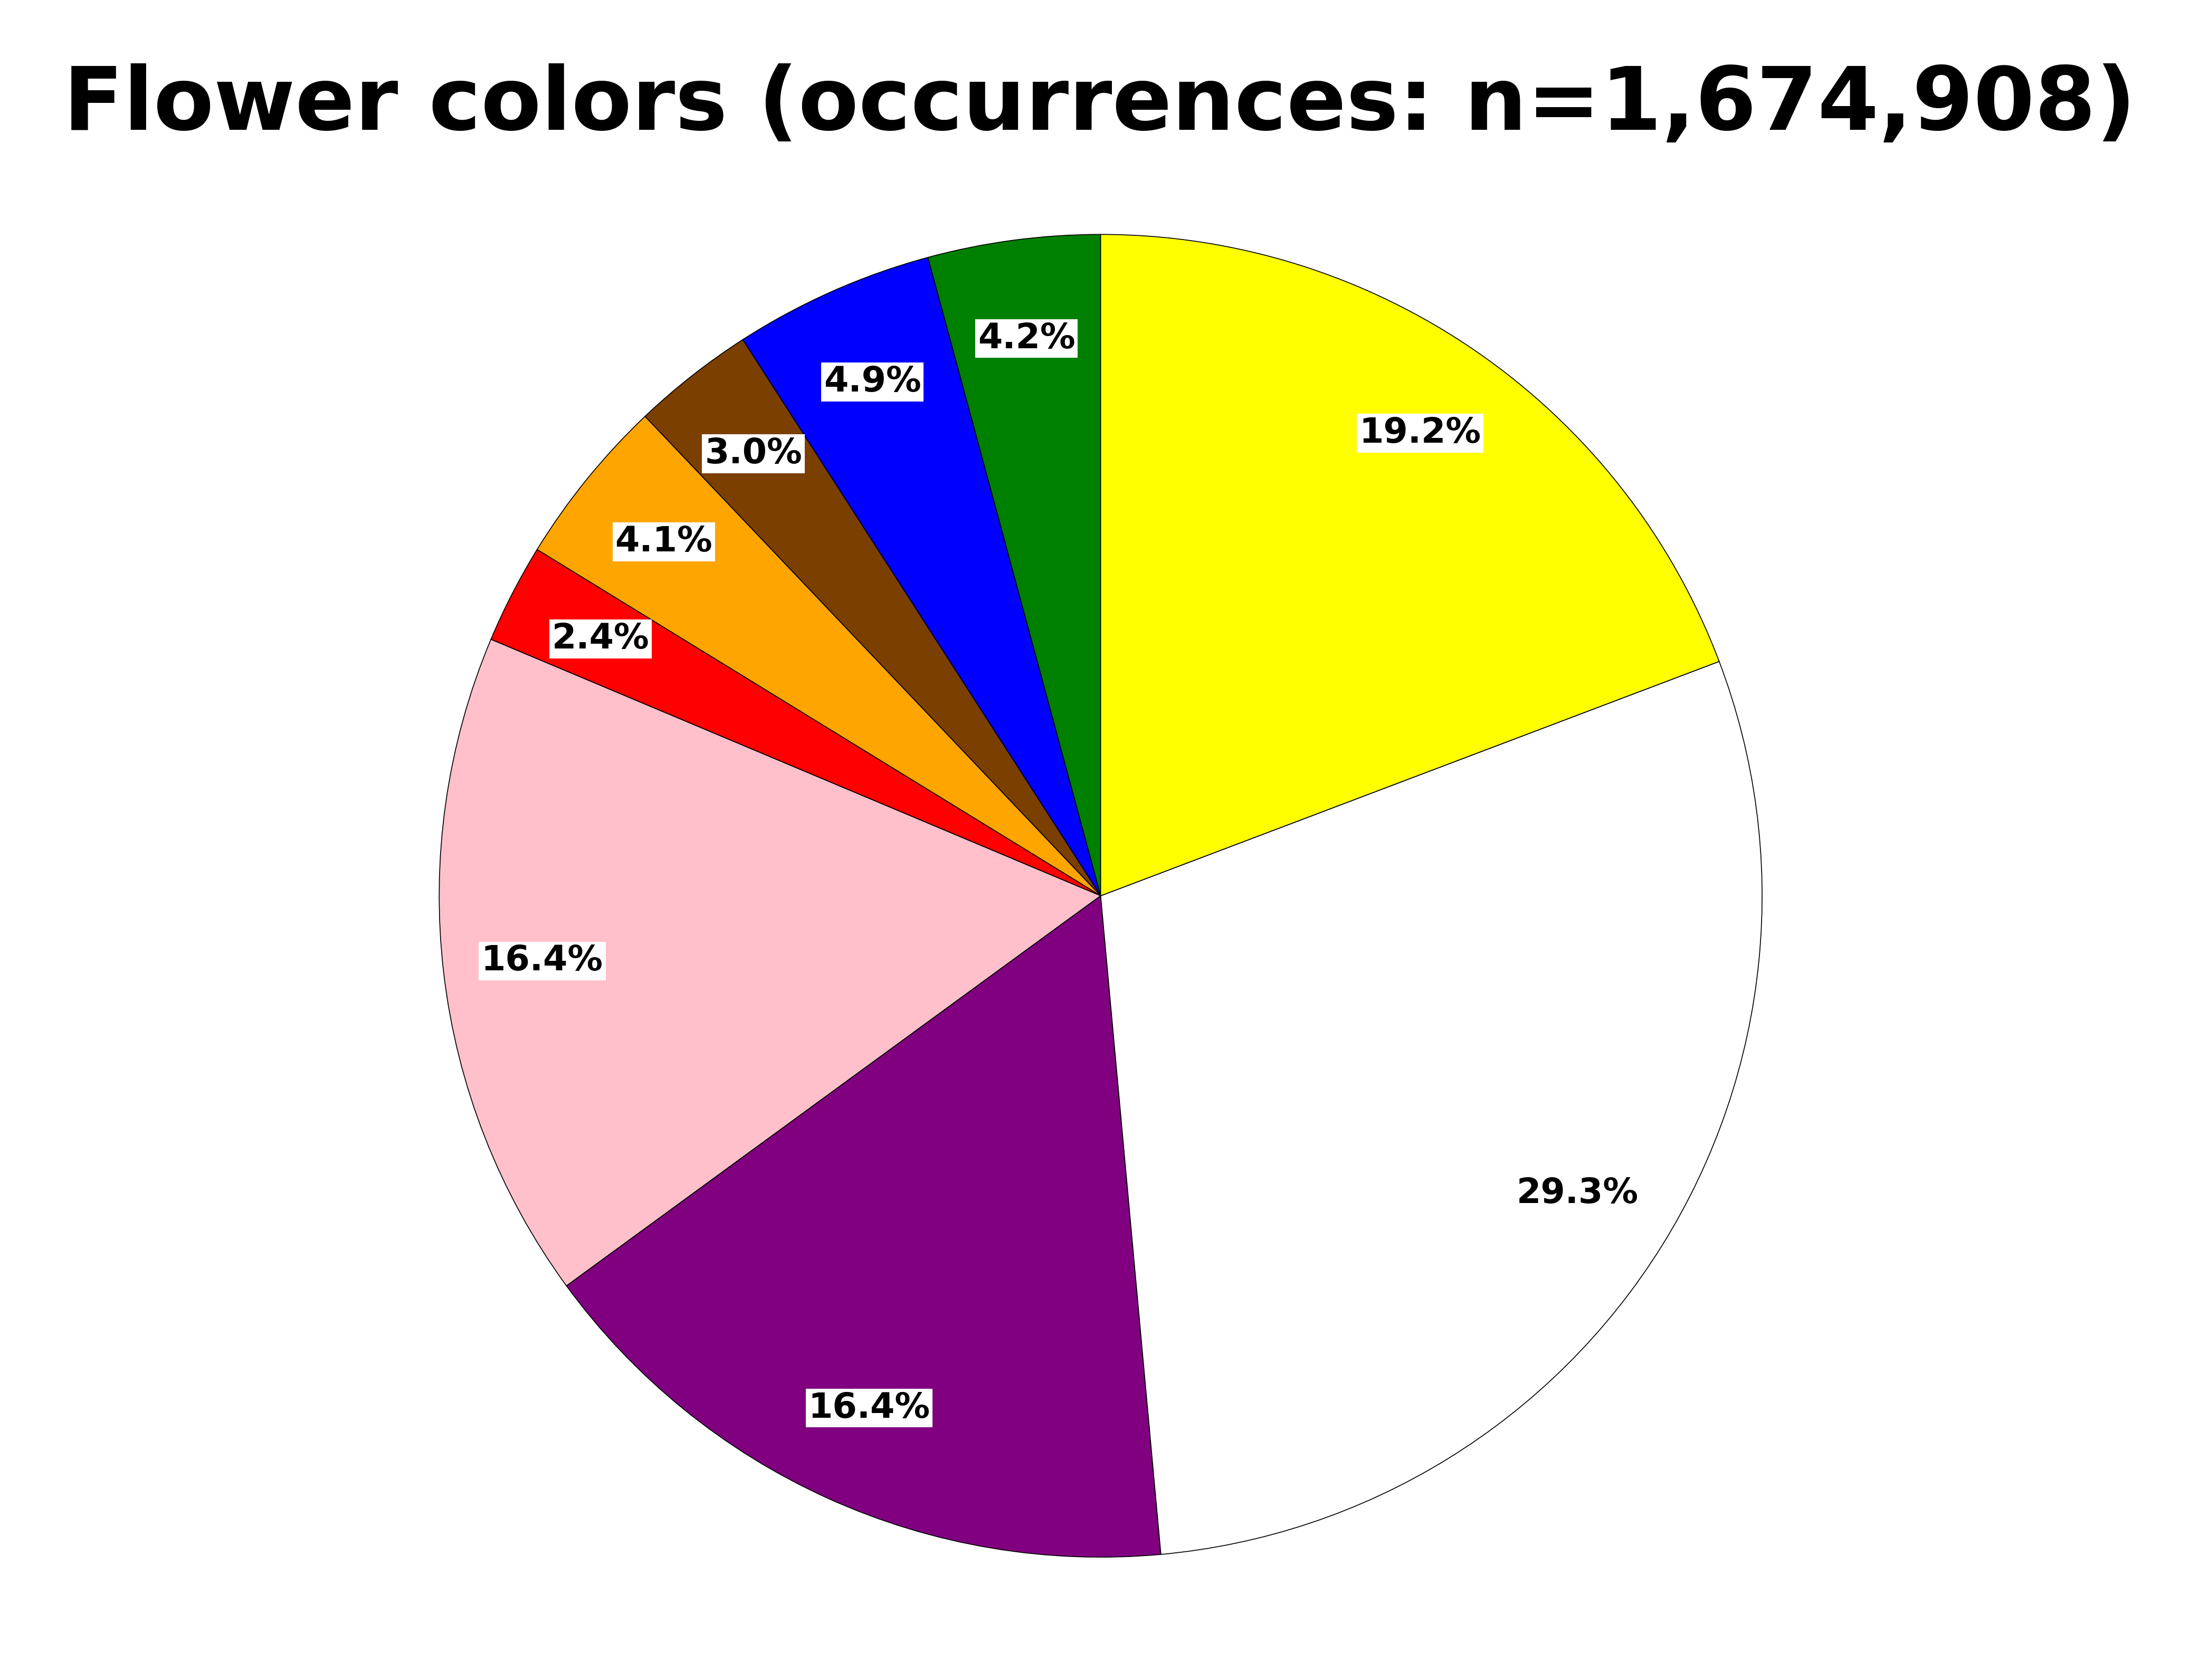

In [34]:
# High resolution
rcParams['figure.dpi'] = 1200

# Create a pie chart
fig, ax = plt.subplots(figsize=[3,3])

wedges, texts, autotexts = ax.pie(nums_reduced, colors=colors_for_plotting, labels=None, autopct='%1.1f%%',
                                  startangle=90, textprops=dict(color="black"), pctdistance=.85,
                                  wedgeprops=dict(edgecolor='black', linewidth=.1), labeldistance=1.4)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Style the texts
plt.setp(texts, size=4)
for autotext in autotexts:
    autotext.set_size(4)
    autotext.set_weight("bold")
    autotext.set_bbox(dict(facecolor='white', edgecolor='none', pad=.3))

# Title
plt.title('Flower colors (occurrences: n=1,674,908)', fontsize=10, fontweight='bold')

# Save the chart to a file
plt.savefig('../occs_pie_chart.pdf', bbox_inches='tight', dpi=600)

# Display the chart
plt.show()